In [ ]:
import tensorflow as tf
ones = tf.ones(shape=(2, 1))
zeroes = tf.zeros(shape=(2, 1))
x = tf.random.normal(shape=(2, 1), mean=0., stddev=1.)
y = tf.random.uniform(shape = (2, 1), minval=0, maxval=1)

print(ones)
print(zeroes)
print(x)
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-0.36583376]
 [-0.3631898 ]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.53288555]
 [0.78405464]], shape=(2, 1), dtype=float32)


In [ ]:
v = tf.Variable(tf.random.normal(shape=(3, 1), mean=0., stddev=1.))
print(v)
v.assign_add(tf.ones((3, 1)))
print(v)
v.assign_sub(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.78710854],
       [-0.73966247],
       [ 0.6406128 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.21289146],
       [0.26033753],
       [1.6406128 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.78710854],
       [-0.73966247],
       [ 0.64061284]], dtype=float32)>


In [ ]:
import tensorflow as tf

a = tf.ones((2, 2))
print(a)
b = tf.matmul(a, a)
print(b)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


# Calculating derviatives 
Using the automatic differentiation feature of Tensorflow, we find the second derivative of a function

In [ ]:
import tensorflow as tf

time = tf.Variable(initial_value=0.)

with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9*time*time
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


# Making a linear classifier from scratch

Loss at step 0: 2.5995
Loss at step 1: 0.3467
Loss at step 2: 0.1460
Loss at step 3: 0.1126
Loss at step 4: 0.1019
Loss at step 5: 0.0947
Loss at step 6: 0.0884
Loss at step 7: 0.0828
Loss at step 8: 0.0777
Loss at step 9: 0.0730
Loss at step 10: 0.0688
Loss at step 11: 0.0649
Loss at step 12: 0.0614
Loss at step 13: 0.0581
Loss at step 14: 0.0552
Loss at step 15: 0.0525
Loss at step 16: 0.0501
Loss at step 17: 0.0479
Loss at step 18: 0.0459
Loss at step 19: 0.0440
Loss at step 20: 0.0423
Loss at step 21: 0.0408
Loss at step 22: 0.0394
Loss at step 23: 0.0381
Loss at step 24: 0.0370
Loss at step 25: 0.0359
Loss at step 26: 0.0350
Loss at step 27: 0.0341
Loss at step 28: 0.0333
Loss at step 29: 0.0326
Loss at step 30: 0.0319
Loss at step 31: 0.0313
Loss at step 32: 0.0307
Loss at step 33: 0.0302
Loss at step 34: 0.0298
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0286
Loss at step 38: 0.0283
Loss at step 39: 0.0280


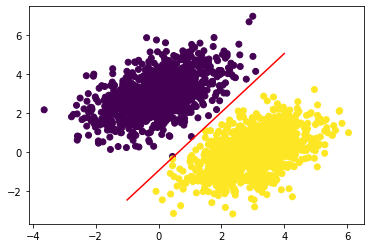

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype=np.float32), np.ones((num_samples_per_class, 1), dtype=np.float32)))

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)